<a href="https://colab.research.google.com/github/hgtruhgijcifrjhtuight/homework/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D1%81%D1%82%D0%B5%D0%BD%D0%BA%D0%BE_320_2%D0%BB%D0%B0%D0%B1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Костенко Валерія Віталіївна, 320

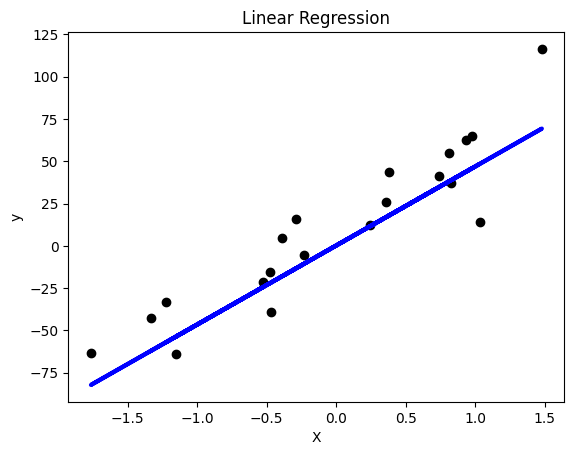

Mean Squared Error: 416.80890612748107


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression  # Додано імпорт make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Згенерувати дані для регресії з використанням make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Розділити дані на тренувальний та тестувальний набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудувати модель лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Побудувати прогноз на тестових даних
y_pred = model.predict(X_test)

# Побудувати графік результуючої регресії
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

# Розрахувати середню квадратичну помилку
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Висновки:

Графік показує лінійну залежність між вхідними даними (X) та відповідними цілями (y).
Значення середньоквадратичної помилки (MSE) вказує на те, наскільки точно модель прогнозує цілі значення. Чим менше значення MSE, тим краще модель.

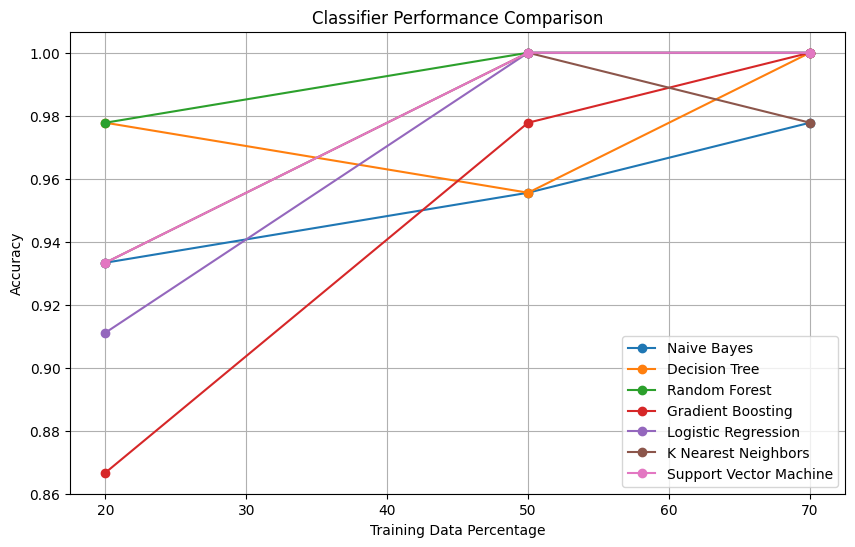

Висновки:
Naive Bayes: Середня точність - 0.96
Decision Tree: Середня точність - 0.98
Random Forest: Середня точність - 0.99
Gradient Boosting: Середня точність - 0.95
Logistic Regression: Середня точність - 0.97
K Nearest Neighbors: Середня точність - 0.97
Support Vector Machine: Середня точність - 0.98


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Завантаження датасету
iris = load_iris()
X, y = iris.data, iris.target

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Список класифікаторів
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Збільшення максимальної кількості ітерацій
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

# Тренування та оцінка класифікаторів
results = {}
for name, clf in classifiers.items():
    clf_results = []
    for train_size in [0.2, 0.5, 0.7]:
        # Визначення кількості тренувальних зразків
        n_train_samples = int(train_size * len(X_train))
        X_train_subset, y_train_subset = X_train[:n_train_samples], y_train[:n_train_samples]

        # Тренування класифікатора
        clf.fit(X_train_subset, y_train_subset)

        # Оцінка класифікатора на тестовому наборі
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        clf_results.append(accuracy)
    results[name] = clf_results

# Фінальний графік результатів
plt.figure(figsize=(10, 6))
for name, accuracies in results.items():
    plt.plot([20, 50, 70], accuracies, marker='o', label=name)
plt.xlabel('Training Data Percentage')
plt.ylabel('Accuracy')
plt.title('Classifier Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Висновки
print("Висновки:")
for name, accuracies in results.items():
    avg_accuracy = np.mean(accuracies)
    print(f"{name}: Середня точність - {avg_accuracy:.2f}")
